In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   
print(len(x_train))

60000


In [2]:
print(type(x_train), repr(x_train))

<class 'numpy.ndarray'> array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,

In [3]:
x_train.shape()

TypeError: 'tuple' object is not callable

In [4]:
x_train.shape

(60000, 28, 28)

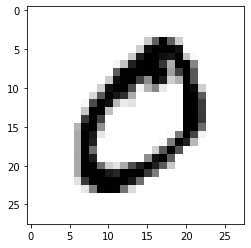

In [8]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [9]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [10]:
cifar10 = keras.datasets.cifar10

In [12]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [14]:
x_train_cifar.shape

(50000, 32, 32, 3)

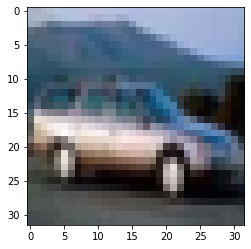

In [19]:
plt.imshow(x_train_cifar[4], cmap=plt.cm.binary)
plt.show()

In [20]:
np.min(x_train)

0

In [21]:
np.max(x_train)

255

In [22]:
np.min(x_train_cifar)

0

In [24]:
np.max(x_train_cifar)

255

In [25]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [37]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
x_train_norm.shape

(60000, 28, 28)

In [28]:
x_test_norm.shape

(10000, 28, 28)

In [32]:
x_train_reshaped=x_train_norm.reshape(60000, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape(10000, 28, 28, 1)

In [38]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4124 - accuracy: 0.8750
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0640 - accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0447 - accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0242 - accuracy: 0.9920


In [39]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0346 - accuracy: 0.9893
test_loss: 0.034634627401828766 
test_accuracy: 0.989300012588501


In [40]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [4.1746815e-09 2.6231705e-08 6.4201657e-07 8.6041831e-07 1.2428544e-08
 7.0161765e-09 9.0140531e-13 9.9999607e-01 2.4121906e-07 2.0856437e-06]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


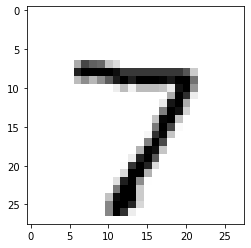

In [41]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.6945699e-07 9.4604686e-05 8.8722062e-01 6.8265462e-04 1.0498902e-06
 9.3691546e-07 3.4138912e-09 1.1169818e-01 3.0170774e-04 2.0407294e-09]
라벨: 7, 예측결과: 2


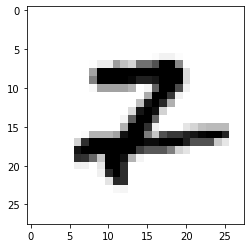

예측확률분포: [5.2758203e-08 9.6127880e-01 1.9950019e-03 1.1146191e-03 1.4989242e-04
 3.7448688e-06 2.2264917e-08 3.1826273e-02 2.3169457e-03 1.3147527e-03]
라벨: 7, 예측결과: 1


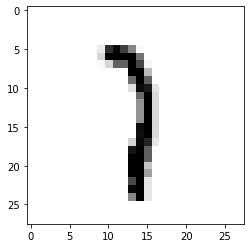

예측확률분포: [1.7168431e-07 5.6309014e-04 2.1354531e-01 1.3346048e-02 1.0544646e-08
 4.6986861e-07 8.2181401e-11 7.0635754e-01 6.6173226e-02 1.4086009e-05]
라벨: 2, 예측결과: 7


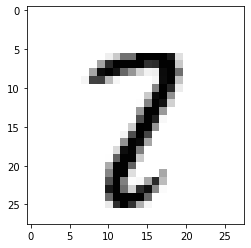

예측확률분포: [1.11334714e-07 5.14945108e-03 7.78475733e-05 3.68064648e-04
 1.03216104e-01 2.41394878e-06 1.40137251e-06 8.36038530e-01
 1.76743255e-03 5.33785969e-02]
라벨: 9, 예측결과: 7


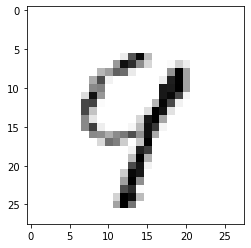

예측확률분포: [1.0570592e-06 3.0006635e-01 1.9882625e-02 1.1397731e-04 1.3195723e-04
 1.6875077e-06 9.8247774e-08 6.7961740e-01 1.7920155e-04 5.6218728e-06]
라벨: 2, 예측결과: 7


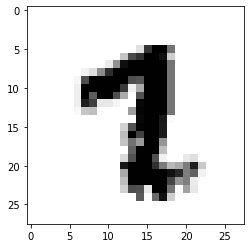

In [42]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()